In [1]:
import sys
sys.path.append('../')
from initial_classif.classifier.classifier import binary_classification
import pickle

/home/jls/.local/lib/python3.5/site-packages/xgboost/__init__.py:29: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)


In [5]:
with open('/local/scratch_2/jls/virac_classifier/binary/edr3/binary_0_test.pkl', 'rb') as f:
    binary = pickle.load(f)
with open('/local/scratch_2/jls/virac_classifier/binary/edr3_SJ/binary_0_test.pkl', 'rb') as f:
    binary_SJ = pickle.load(f)

In [13]:
binary.cm/np.sum(binary.cm,axis=1)

array([[0.84026422, 0.16053108],
       [0.12951008, 0.8698451 ]])

In [14]:
binary_SJ.cm/np.sum(binary_SJ.cm,axis=1)

array([[0.83947776, 0.16055436],
       [0.13190936, 0.86806424]])

In [15]:
binary.feature_importance

{'ks_eta': 0.025265547941152083,
 'ks_kurtosis': 0.07024863808604231,
 'ks_mad': 0.05911362080799167,
 'ks_mad_over_error': 0.178687480797543,
 'ks_p100_p0': 0.007789561444614355,
 'ks_p100_p0_over_error': 0.010814662180404992,
 'ks_p75_p25': 0.0647531159501998,
 'ks_p75_p25_over_error': 0.1543316998876986,
 'ks_p84_p16': 0.05185341689254497,
 'ks_p84_p16_over_error': 0.07808445170138227,
 'ks_p95_p5': 0.020109824241293782,
 'ks_p95_p5_over_error': 0.01631444365367672,
 'ks_p99_p1': 0.009601424881741432,
 'ks_p99_p1_over_error': 0.012422953103254426,
 'ks_skew': 0.03374333977307327,
 'ks_stdev': 0.018430409235358537,
 'ks_stdev_over_error': 0.009846042340680598,
 'ks_stetson_i': 0.1301010370270934,
 'ks_stetson_j': 0.02309815560522124,
 'ks_stetson_k': 0.025390174449032542}

In [16]:
binary_SJ.feature_importance

{'ks_eta': 0.019984920975220602,
 'ks_kurtosis': 0.07926625081857495,
 'ks_mad': 0.05534954198344636,
 'ks_mad_over_error': 0.18843605836732807,
 'ks_p100_p0': 0.0073816824305468435,
 'ks_p100_p0_over_error': 0.010147935695176425,
 'ks_p75_p25': 0.07099371401065639,
 'ks_p75_p25_over_error': 0.11356410686957319,
 'ks_p84_p16': 0.044902216855429625,
 'ks_p84_p16_over_error': 0.08704624798792669,
 'ks_p95_p5': 0.022585017558230995,
 'ks_p95_p5_over_error': 0.019431807353879792,
 'ks_p99_p1': 0.01128439394417699,
 'ks_p99_p1_over_error': 0.012720000482449815,
 'ks_skew': 0.03603502851702129,
 'ks_stdev': 0.020201471892780713,
 'ks_stdev_over_error': 0.012322880376281377,
 'ks_stetson_i': 0.12670373736648946,
 'ks_stetson_j': 0.03691210974648069,
 'ks_stetson_k': 0.024730876768329656}

In [26]:
with open('/local/scratch_2/jls/virac_classifier/binary/edr3/binary_150.pkl', 'rb') as f:
    binary0 = pickle.load(f)
print(binary0.feature_importance['ks_stetson_j'])

0.040118067197748915


In [4]:
import pickle
import sys
sys.path.append('../')
with open('/local/scratch_2/jls/virac_classifier/binary/edr3_SJ/binary_training_set_0_test.pkl', 'rb') as f:
    bt = pickle.load(f)

/home/jls/.local/lib/python3.5/site-packages/xgboost/__init__.py:29: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)


In [17]:
1./np.nansum(np.ones(0))

/data/jls/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


inf

In [1]:
vv = pd.read_csv('/local/scratch_2/jls/virac_classifier/variable/edr3_SJ/variable_training_set_edr3_sourceid.csv')

In [4]:
import sys
sys.path.append('../')
from initial_classif.classifier.classifier import binary_classification
import pickle
import glob
from config import configuration
config = configuration()
config.request_password()

/home/jls/.local/lib/python3.5/site-packages/xgboost/__init__.py:29: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)


 ·············


In [5]:
import sqlutilpy
ss = pd.DataFrame(sqlutilpy.get('''select distinct(sourceid) from leigh_smith.virac2_ts_tmolnar_train_zyjhk''',
                               **config.wsdb_kwargs))

In [14]:
ss['flg']=1

In [15]:
oo = pd.merge(vv, ss, how='outer', on='sourceid')

In [22]:
np.count_nonzero(oo['flg']!=oo['flg'])

676

In [24]:
oo['sourceid'][oo['flg']!=oo['flg']].to_csv('training_set_extra_sources.csv', index=False)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [7]:
len(vv)

440191

In [41]:
with open('/local/scratch_2/jls/virac_classifier/variable/edr3_SJ/variable_features_total.pkl', 'rb') as f:
    vv_full = pickle.load(f)

In [25]:
vv_full

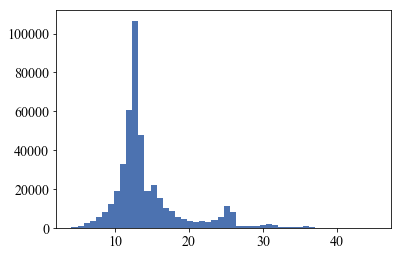

In [43]:
plt.hist(vv_full['phase_lag_mean'],bins=50);

In [31]:
vv_full.columns

Index(['H_contemp_abs', 'H_contemp_std', 'H_model', 'H_nobs', 'H_scale',
       'J_contemp_abs', 'J_contemp_std', 'J_model', 'J_nobs', 'J_scale',
       ...
       'a1_a2', 'a1_a2_double', 'phi3_phi1', 'phi3_phi1_double', 'a1_a3',
       'a1_a3_double', 'phi3_phi2', 'phi3_phi2_double', 'a2_a3',
       'a2_a3_double'],
      dtype='object', length=143)

In [56]:
!ls -lt /local/scratch_2/jls/virac_classifier/variable/edr3/variable_features_total.pkl

-rw-r--r-- 1 jls jls 700623251 Feb  4 05:12 /local/scratch_2/jls/virac_classifier/variable/edr3/variable_features_total.pkl


In [274]:
with open('/local/scratch_2/jls/virac_classifier/variable/edr3_SJ/variable_features_total.pkl', 'rb') as f:
    vv_full = pickle.load(f)
with open('/local/scratch_2/jls/virac_classifier/variable/edr3/variable_features_total.pkl', 'rb') as f:
    vv_full_old = pickle.load(f)
with open('/local/scratch_2/jls/virac_classifier/variable/edr3_SJ_noalias/variable_features_total.pkl', 'rb') as f:
    vv_full_na = pickle.load(f)

In [54]:
vv_match = pd.merge(vv_full, vv_full_old, on='sourceid')

[]

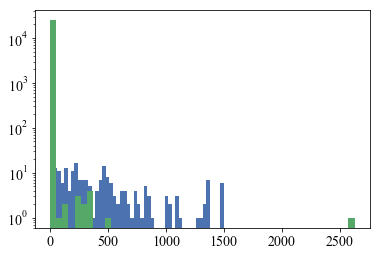

In [63]:
plt.hist((vv_match['lsq_period_x']-vv_match['cat_period_x'])[vv_match['var_class_x']=='RRab'],bins=50);
plt.semilogy()

plt.hist((vv_match['lsq_period_y']-vv_match['cat_period_y'])[vv_match['var_class_x']=='RRab'],bins=50);
plt.semilogy()

In [290]:
def period_fix(var_in,tol=1.):

    period_out = var_in['lsq_period'].values.copy()

    period_out[((var_in['var_class']=='EA/EB')|(var_in['var_class']=='Ell'))&
                (var_in['amp_0']>tol*var_in['amp_1'])]*=2.
    
    ss=np.argmax([var_in['amp_0'].values,
                  var_in['amp_1'].values,
                  var_in['amp_2'].values,
                  var_in['amp_3'].values],axis=0)
    fltr = ~((var_in['var_class']=='EA/EB')|(var_in['var_class']=='Ell'))
    period_out[fltr]/=(1.+ss)[fltr]
    
    period_out[var_in['var_class']=='EW']*=2
    
    return period_out
    

2976
2.7031691388189985


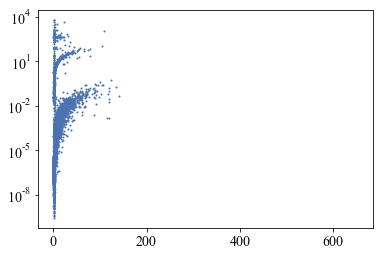

In [328]:
fltr = (vv_full_old['var_class']=='EA/EB')&(vv_full_old['log10_fap_ls']<-10)
plt.plot(vv_full_old['cat_period'][fltr],(period_fix(vv_full_old)-vv_full_old['cat_period'])[fltr],'.',ms=2)
# plt.plot(vv_match['cat_period_y'][fltr],(vv_match['lsq_period_y']-vv_match['cat_period_y'])[fltr],'.',ms=5)
# plt.xlim(0.,1.)
plt.semilogy()
print(np.count_nonzero(np.abs(period_fix(vv_full_old)/vv_full_old['cat_period']-1)[fltr]>0.2))
print(100.*np.count_nonzero(np.abs(period_fix(vv_full_old)/vv_full_old['cat_period']-1)[fltr]>0.2)/np.count_nonzero(fltr))

[]

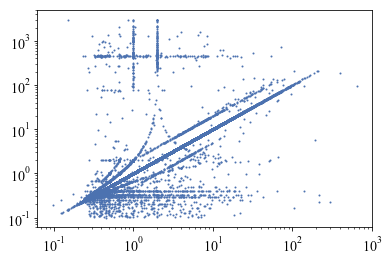

In [335]:
fltr = (vv_full['var_class']=='EA/EB')&(vv_full['log10_fap_ls']<-10)
plt.plot(vv_full['cat_period'][fltr],(period_fix(vv_full))[fltr],'.',ms=2)
plt.semilogy();plt.semilogx()

In [354]:
mm = pd.read_csv('../mira_sample.csv')

In [366]:
np.count_nonzero(np.isnan(vv_full['cat_period']))

35178

In [364]:
vv_full_na[vv_full_na['sourceid']==mm['virac_id'][36]]['var_class']

31361    MIRA
Name: var_class, dtype: object

In [353]:
np.count_nonzero(vv_full_na['var_class']=='MIRA')

60

In [340]:
np.count_nonzero(np.isnan(vv_full['cat_period'])&(vv_full['log10_fap_ls']<-10))

91

[]

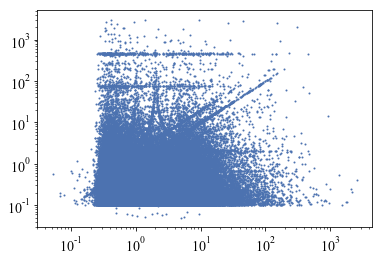

In [342]:
fltr = (vv_full_na['var_class']=='EA/EB')&(vv_full_na['log10_fap_ls']>-10)
plt.plot(vv_full_na['cat_period'][fltr],(period_fix(vv_full_na))[fltr],'.',ms=2)
plt.semilogy();plt.semilogx()

[]

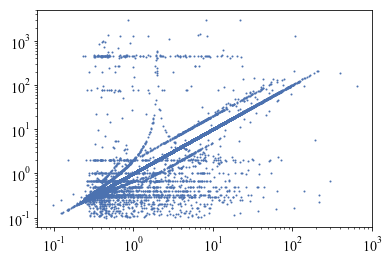

In [332]:
plt.plot(vv_full_na['cat_period'][fltr],(period_fix(vv_full_na))[fltr],'.',ms=2)
plt.semilogy();plt.semilogx()

3045
2.7639855855201647


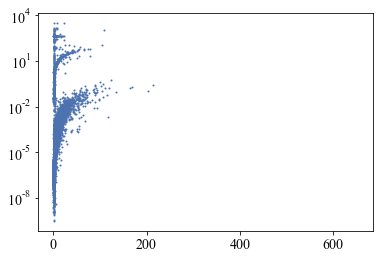

In [329]:
fltr = (vv_full_na['var_class']=='EA/EB')&(vv_full_na['log10_fap_ls']<-10)
plt.plot(vv_full_na['cat_period'][fltr],(period_fix(vv_full_na)-vv_full_na['cat_period'])[fltr],'.',ms=2)
# plt.plot(vv_match['cat_period_y'][fltr],(vv_match['lsq_period_y']-vv_match['cat_period_y'])[fltr],'.',ms=5)
# plt.xlim(0.,1.5)
plt.semilogy()
print(np.count_nonzero(np.abs(period_fix(vv_full_na)/vv_full_na['cat_period']-1)[fltr]>0.2))
print(100.*np.count_nonzero(np.abs(period_fix(vv_full_na)/vv_full_na['cat_period']-1)[fltr]>0.2)/np.count_nonzero(fltr))

[]

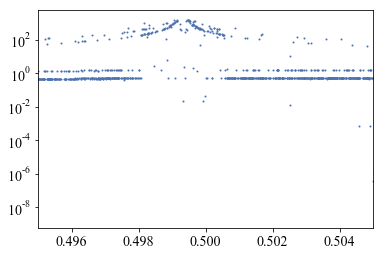

In [95]:
fltr = (vv_match['var_class_x']=='RRab')
plt.plot(vv_match['cat_period_x'][fltr],(vv_match['lsq_period_x']-vv_match['cat_period_x'])[fltr],'.',ms=2)
# plt.plot(vv_match['cat_period_y'][fltr],(vv_match['lsq_period_y']-vv_match['cat_period_y'])[fltr],'.',ms=5)
plt.xlim(0.5-0.005,0.5+0.005)
plt.semilogy()

In [72]:
import sys
sys.path.append('../')
from config import configuration
config = configuration()
config.request_password()

def get_lightcurve(sourceid):

    lcs = pd.DataFrame(sqlutilpy.get('''
                                select sourceid, 
                                unnest(mjdobs) as mjdobs,
                                unnest(mag) as mag,
                                unnest(emag) as emag,
                                unnest(filterid) as filterid,
                                unnest(chi) as chi,
                                unnest(ast_res_chisq) as ast_res_chisq,
                                unnest(ambiguous_match) as ambiguous_match  
                                from leigh_smith.virac2_ts_tmolnar_train_zyjhk where sourceid={0}'''.format(sourceid),
                     **config.wsdb_kwargs))
    
    if len(lcs)==0:

        lcs = pd.DataFrame(sqlutilpy.get('''
                                    select sourceid, 
                                    unnest(mjdobs) as mjdobs,
                                    unnest(mag) as mag,
                                    unnest(emag) as emag,
                                    unnest(filterid) as filterid,
                                    unnest(chi) as chi,
                                    unnest(ast_res_chisq) as ast_res_chisq,
                                    unnest(ambiguous_match) as ambiguous_match  
                                    from leigh_smith.virac2_ts_tmolnar_variables where sourceid={0}'''.format(sourceid),
                         **config.wsdb_kwargs))
    
    return lcs


 ·············


In [73]:
import sys
sys.path.append('../')
from fine_classif.feat_extract.compute_feats import correct_to_HJD, fourier_poly_chi2_fit_full, \
    retrieve_fourier_poly, LombScargle
from fine_classif.feat_extract.compute_feats import sigclipper, \
optimum_regularization, check_significant_second_minimum, find_phase_of_minimum

In [220]:
def period_fix(var_in,tol=1.):

    period_out = var_in['lsq_period'].values.copy()

    period_out[((var_in['var_class']=='EA/EB')|(var_in['var_class']=='Ell'))&
                (var_in['amp_0']>tol*var_in['amp_1'])]*=2.
    
    ss=np.argmax([var_in['amp_0'].values,
                  var_in['amp_1'].values,
                  var_in['amp_2'].values,
                  var_in['amp_3'].values],axis=0)
    fltr = ~((var_in['var_class']=='EA/EB')|(var_in['var_class']=='Ell'))
    period_out[fltr]/=(1.+ss)[fltr]
    
    period_out[var_in['var_class']=='EW']*=2
    
    return period_out
    
def plot_lightcurve(vv_full,ii,ax=None,reg=True):
    sid,per,clss=vv_full['sourceid'].values[ii],period_fix(vv_full)[ii],vv_full['var_class'].values[ii]
    cper = vv_full['cat_period'].values[ii]
    prb = 0.#vv_full['prob'].values[ii]
    print(vv_full['var_class'].values[ii])
    print('LSQ period', vv_full['lsq_period'].values[ii])
    print(vv_full['significant_second_minimum'].values[ii])
    print('corrected LSQ period', period_fix(vv_full)[ii])
    print(sid)
    print('Cat period', cper)
    results_d, lc, _=plot_lc_sid(sid, vv_full['ra'].values[ii], vv_full['dec'].values[ii],per,
                vv_full['lsq_nterms'].values[ii], cper, ax=ax, reg=reg)
    plt.title('%s, classif. prob.=%0.4f'%(clss,prb),loc='left',fontsize=18)
    return results_d, lc, _

        
def is_window_function_peak(times, mags, errors, freqs, power, NW=5):
    model = LombScargle(times,
                    np.ones_like(times),
                    errors,
                    center_data=False, fit_mean=False
                    )
    power_window = model.power(freqs)
    return power_window>power

def plot_lc_sid(sid,ra,dec,per,nterms,cper,ax=None,reg=True):
    lc=get_lightcurve(sid)
    clean = (lc['filterid']==5)&(lc['ambiguous_match']==0)&(lc['ast_res_chisq']<13.)&(lc['chi']<5.)
    lc = sigclipper(lc[clean])

    correct_to_HJD(lc,
                 ra,
                 dec)

    tt = lc['HJD'].values[np.argmin(np.abs(lc['mag'].values-np.nanpercentile(lc['mag'],98.)))]

    model = LombScargle(lc['HJD'].values-tt, lc['mag'].values, 
                        lc['emag'].values, normalization='standard')
    freq, power = model.autopower(maximum_frequency=10.)

    iwf = is_window_function_peak(lc['HJD'].values-tt, lc['mag'].values, 
                                    lc['emag'].values, freq, power)
    
    
    if ax is None:
        f,ax=plt.subplots(2,1,figsize=[5.,5.5],gridspec_kw={'height_ratios':[1.,0.3]})
    plt.sca(ax[0])
    plt.errorbar((((lc['HJD'].values-tt)%(cper))/cper),
                 lc['mag'].values,
                 yerr=lc['emag'].values,fmt='o',color='gray',mew=0.5,mec='k')
#     plt.ylim(np.nanmean(lc['mag'].values)-0.3,np.nanmean(lc['mag'].values)+0.3)
    plt.gca().invert_yaxis()
#     plt.xlim(-0.1,2.1)
    # plt.ylim(-0.5,0.5)
    plt.xlabel('Phase')
    plt.ylabel(r'$K_s$ [mag]')
    return freq, power, iwf
#     nterms=combo_dset['lsq_nterms'].values[fltr][ii]
    opt_reg=0
    if reg:
        opt_reg=optimum_regularization(lc['mag'].values, lc['emag'].values)
    print(opt_reg)
    results_d = fourier_poly_chi2_fit_full(
                                             times=lc['HJD'].values-tt,
                                             mag=lc['mag'].values,
                                             err=lc['emag'].values,
                                             freq_dict={'freq_grid':np.array([1./per])},
                                             nterms=np.int64(nterms),
                                             npoly=3,
                                             regularization=opt_reg,
                                             time_zeropoint_poly=0.,
                                             regularize_by_trace = True,
                                             check_multiples=False, 
                                             use_power_of_2=False,
                                             return_period_error=False)
    print(find_phase_of_minimum(results_d))
    print(check_significant_second_minimum(results_d, 
                                          find_phase_of_minimum(results_d)))
    
    xx=np.linspace(-0.1*per,2.1*per,1000)
    FF = retrieve_fourier_poly(xx,
                               results_d)
    plt.plot(xx/per, FF,color='#FFA500',lw=3)

    plt.sca(ax[1])
    plt.plot(1./freq,power,color='#FFA500',lw=0.6)
    plt.xlim(np.max([per*0.2,0.1]),per*5.)
    plt.semilogx()

    plt.gca().xaxis.set_major_locator(LogLocator(subs=(0.5,1.,2.)))
    plt.gca().xaxis.set_major_formatter(ScalarFormatter())

    plt.axvline(per,color='gray',ls='dashed',alpha=0.5,lw=3,zorder=-10)
    plt.axvline(per/2.,color='gray',ls='dashed',alpha=0.2,lw=3,zorder=-10)

    plt.annotate('Period=%0.4f days'%per,xy=(0.98,0.95),ha='right',va='top',xycoords='axes fraction',
                fontsize=15)
    
    plt.xlim(0.3,0.7)
    
    plt.xlabel('Period [days]')
    plt.ylabel('LS Power')
    plt.ylim(0.,)
    plt.subplots_adjust(hspace=0.32)
    
    plt.figure()
    plt.errorbar((((lc['HJD'].values-tt))),
                 lc['mag'].values,
                 yerr=lc['emag'].values,fmt='o',color='gray',mew=0.5,mec='k')
    plt.gca().invert_yaxis()
    plt.xlabel('Phase')
    plt.ylabel(r'$K_s$ [mag]')
    xx = np.linspace(*np.nanpercentile(lc['HJD'].values-tt,[0.,100.]),1000)
    FF = retrieve_fourier_poly(xx,
                               results_d)
    plt.plot(xx, FF,color='#FFA500',lw=3)
    
    plt.figure()
    plt.errorbar((((lc['HJD'].values-tt) % (2.*cper))),
                 lc['mag'].values,
                 yerr=lc['emag'].values,fmt='o',color='gray',mew=0.5,mec='k')
    plt.gca().invert_yaxis()
#     plt.xlim(-0.1,2.1)
    # plt.ylim(-0.5,0.5)
    plt.xlabel('Phase')
    plt.ylabel(r'$K_s$ [mag]')
    opt_reg=0
    if reg:
        opt_reg=optimum_regularization(lc['mag'].values, lc['emag'].values)
    print(opt_reg)
    results_d = fourier_poly_chi2_fit_full(
                                             times=lc['HJD'].values-tt,
                                             mag=lc['mag'].values,
                                             err=lc['emag'].values,
                                             freq_dict={'freq_grid':np.array([1./cper])},
                                             nterms=np.int64(nterms),
                                             npoly=3,
                                             regularization=opt_reg,
                                             time_zeropoint_poly=0.,
                                             regularize_by_trace = True,
                                             check_multiples=False, 
                                             use_power_of_2=False,
                                             return_period_error=False)
    
    xx=np.linspace(-0.1*cper,2.1*cper,1000)
#     xx = np.linspace(*np.nanpercentile(lc['HJD'].values-tt,[0.,100.]),1000)
    FF = retrieve_fourier_poly(xx,
                               results_d)
    plt.plot(xx, FF,color='#FFA500',lw=3)
    return results_d, lc
    # plt.plot((lc['mjdobs'][clean]%(cper)/cper),lc['mag'][clean]-np.nanmedian(lc['mag'][clean]),'.')

In [185]:
np.argwhere((np.abs((vv_full['cat_period']-0.5))<1e-5)&(vv_full['var_class']=='EA/EB'))

array([[ 79438],
       [291893],
       [352467],
       [355898]])

In [233]:
np.argwhere((np.abs((vv_full_old['lsq_period']-1.))<1e-4)&(vv_full_old['var_class']=='EA/EB')&(vv_full_old['log10_fap_ls']<-10))

array([[ 80360],
       [216442],
       [321141]])

EA/EB
LSQ period 1.0000814550639894
False
corrected LSQ period 2.0001629101279788
9335818002061
Cat period 0.6667161


(0.0, 5.0)

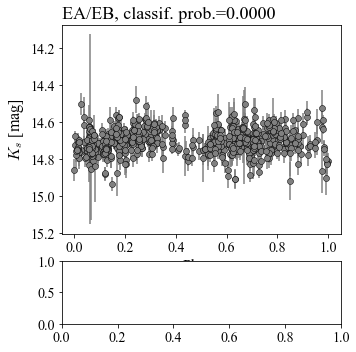

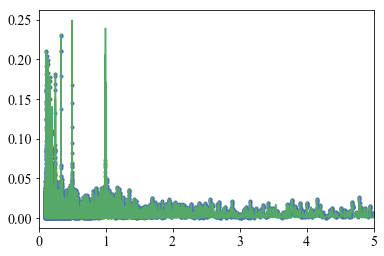

In [235]:
import sqlutilpy
from matplotlib.ticker import LogLocator, ScalarFormatter
fq,pq,iwf=plot_lightcurve(vv_full_old,216442);
plt.figure()
plt.plot(1./fq[~iwf],pq[~iwf],'.')
plt.plot(1./fq,pq)
plt.xlim(0.98,1.02)
plt.xlim(0.,5.)
# plt.xlim(0.99,1.01)
# plt.xlim(0.499,0.501)
# plt.axvline(1./0.9999)
# plt.axvspan(1./0.9999+0.0007,1./0.9999-0.0007,alpha=0.2)
# plt.axvline(1./0.9972)
# plt.axvspan(1./0.9972+0.0007,1./0.9972-0.0007,alpha=0.2)
# plt.axvline(.5/0.9999)
# plt.axvspan(.5/0.9999+0.0007,.5/0.9999-0.0007,alpha=0.2)
# plt.axvline(.5/0.9972)
# plt.axvspan(.5/0.9972+0.0007,.5/0.9972-0.0007,alpha=0.2)

In [209]:
np.max(vv_full['log10_fap_ls'])

0.0

[]

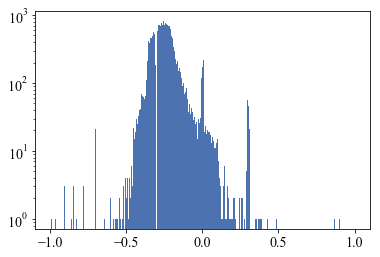

In [210]:
plt.hist(np.log10(vv_full['lsq_period'])[(vv_full['var_class']=='RRab')&(vv_full['log10_fap_ls']<-10)],range=[-1,1],bins=350);
plt.semilogy()

[]

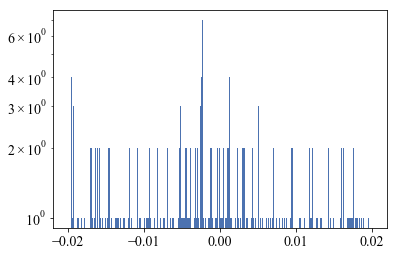

In [224]:
plt.hist(np.log10(vv_full_old['lsq_period'])[(vv_full_old['var_class']=='RRab')&(vv_full_old['log10_fap_ls']<-5)],
         range=[-0.02,0.02],bins=350);
plt.semilogy()

In [248]:
with open('/local/scratch_2/jls/virac_classifier/variable/edr3/variable_features_total_test.pkl', 'rb') as f:
    vv_full_test_old = pickle.load(f)

In [268]:
with open('/local/scratch_2/jls/virac_classifier/variable/edr3_SJ/variable_features_total_test.pkl', 'rb') as f:
    vv_full_test = pickle.load(f)

In [367]:
with open('/local/scratch_2/jls/virac_classifier/variable/edr3_SJ_noalias/variable_features_total_test.pkl', 'rb') as f:
    vv_full_test_na = pickle.load(f)

In [379]:
np.count_nonzero(np.abs(period_fix(vv_full_test_na)[(vv_full_test_na['log10_fap_ls']<-10)]/vv_full_test_na['cat_period'].values[(vv_full_test_na['log10_fap_ls']<-10)]-1)>0.001)

18

In [372]:
with open('/local/scratch_2/jls/virac_classifier/variable/edr3_SJ_noalias/variable_features_total_test.pkl', 'rb') as f:
    vv_full_test_na_2 = pickle.load(f)

In [380]:
np.count_nonzero(np.abs(period_fix(vv_full_test_na_2)[(vv_full_test_na_2['log10_fap_ls']<-10)]/vv_full_test_na_2['cat_period'].values[(vv_full_test_na_2['log10_fap_ls']<-10)]-1)>0.001)

19

[]

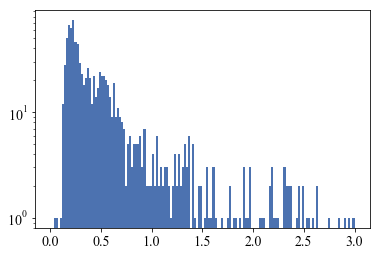

In [251]:
# plt.hist(vv_full_test['lsq_period'][
#     (vv_full_test['log10_fap_ls']<-10)],range=[0,3],bins=150);
plt.hist(vv_full_test_old['lsq_period'][
    (vv_full_test_old['log10_fap_ls']<-10)],range=[0,3],bins=150);
plt.semilogy()

[]

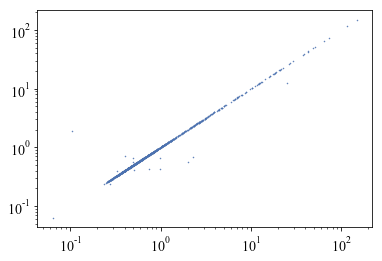

In [273]:
plt.plot(period_fix(vv_full_test_old)[(vv_full_test_old['log10_fap_ls']<-10)],
         vv_full_test_old['cat_period'].values[(vv_full_test_old['log10_fap_ls']<-10)],'.',ms=1)
plt.semilogy()
plt.semilogx()

[]

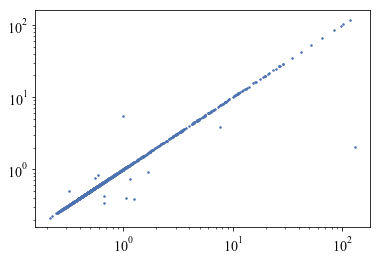

In [369]:
plt.plot(period_fix(vv_full_test_na)[(vv_full_test_na['log10_fap_ls']<-10)],
         vv_full_test_na['cat_period'].values[(vv_full_test_na['log10_fap_ls']<-10)],'.',ms=3)
plt.semilogy()
plt.semilogx()

[]

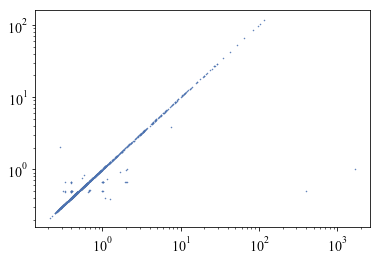

In [272]:
plt.plot(period_fix(vv_full_test)[(vv_full_test['log10_fap_ls']<-10)],
         vv_full_test['cat_period'].values[(vv_full_test['log10_fap_ls']<-10)],'.',ms=1)
plt.semilogy()
plt.semilogx()

[]

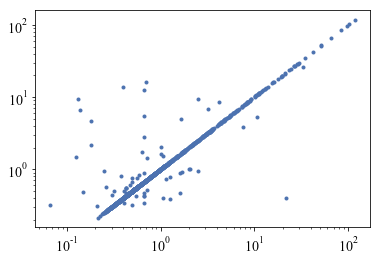

In [256]:
plt.plot(period_fix(vv_full_test)[(vv_full_test['log10_fap_ls']<-5)],
         vv_full_test['cat_period'].values[(vv_full_test['log10_fap_ls']<-5)],'.')
plt.semilogy()
plt.semilogx()

In [259]:
vv_full_test['sourceid'].values[0]

8188900007280

In [265]:
lcc=get_lightcurve(8188900007280)

In [266]:
np.count_nonzero((lcc['filterid']==5))

167

In [267]:
vv_full_test['ks_n_detections'].values[0]

167